In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('tableau-colorblind10')

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [2]:
from scipy.special import erf
from scipy import stats
from pynverse import inversefunc
import math

In [6]:
def get_chance(s=0):
    p_A = c_A/n_A
    p_B = c_B/n_B
    n_B2 = n_B + s
    c_B2 = n_B2 * p_B
    n_A2 = n_A + s
    c_A2 = n_A2 * p_A

    global uplift
    beta_A = stats.beta(c_A2, n_A2 - c_A2)
    beta_B = stats.beta(c_B2, n_B2 - c_B2)

    subs_std = np.sqrt(beta_A.var()+beta_B.var())
    subs_mean = beta_B.mean()-beta_A.mean()
    uplift = subs_mean/beta_A.mean()

    z = subs_mean/(subs_std*np.sqrt(2))
    erf_z = erf(z)
    chance = (1+erf_z)/2

    return chance

In [7]:
def get_more_samples():
    more_samples = math.ceil(inversefunc(get_chance,0.975))
    return more_samples

In [8]:
n_A = 12000
c_A = 2588

n_B = 12000
c_B = 2657

chance = get_chance()
more_samples = get_more_samples()

print(f'''
[실험 결과]
- {round(chance*100,1)}의 확률로 {round(uplift[0]*100,1)}개선
- {more_samples}개 샘플 더 필요
''')


[실험 결과]
- 85.9의 확률로 2.7개선
- 27683개 샘플 더 필요



In [12]:
add_samples = pd.DataFrame()
p_B = c_B/n_B
p_A = c_A/n_A

for s in range(0,55000,1000):
    chance = get_chance(s)
    add_samples.loc[s,'add_samples'] = s
    add_samples.loc[s,'chance'] = chance
    add_samples.loc[s,'uplift'] = uplift

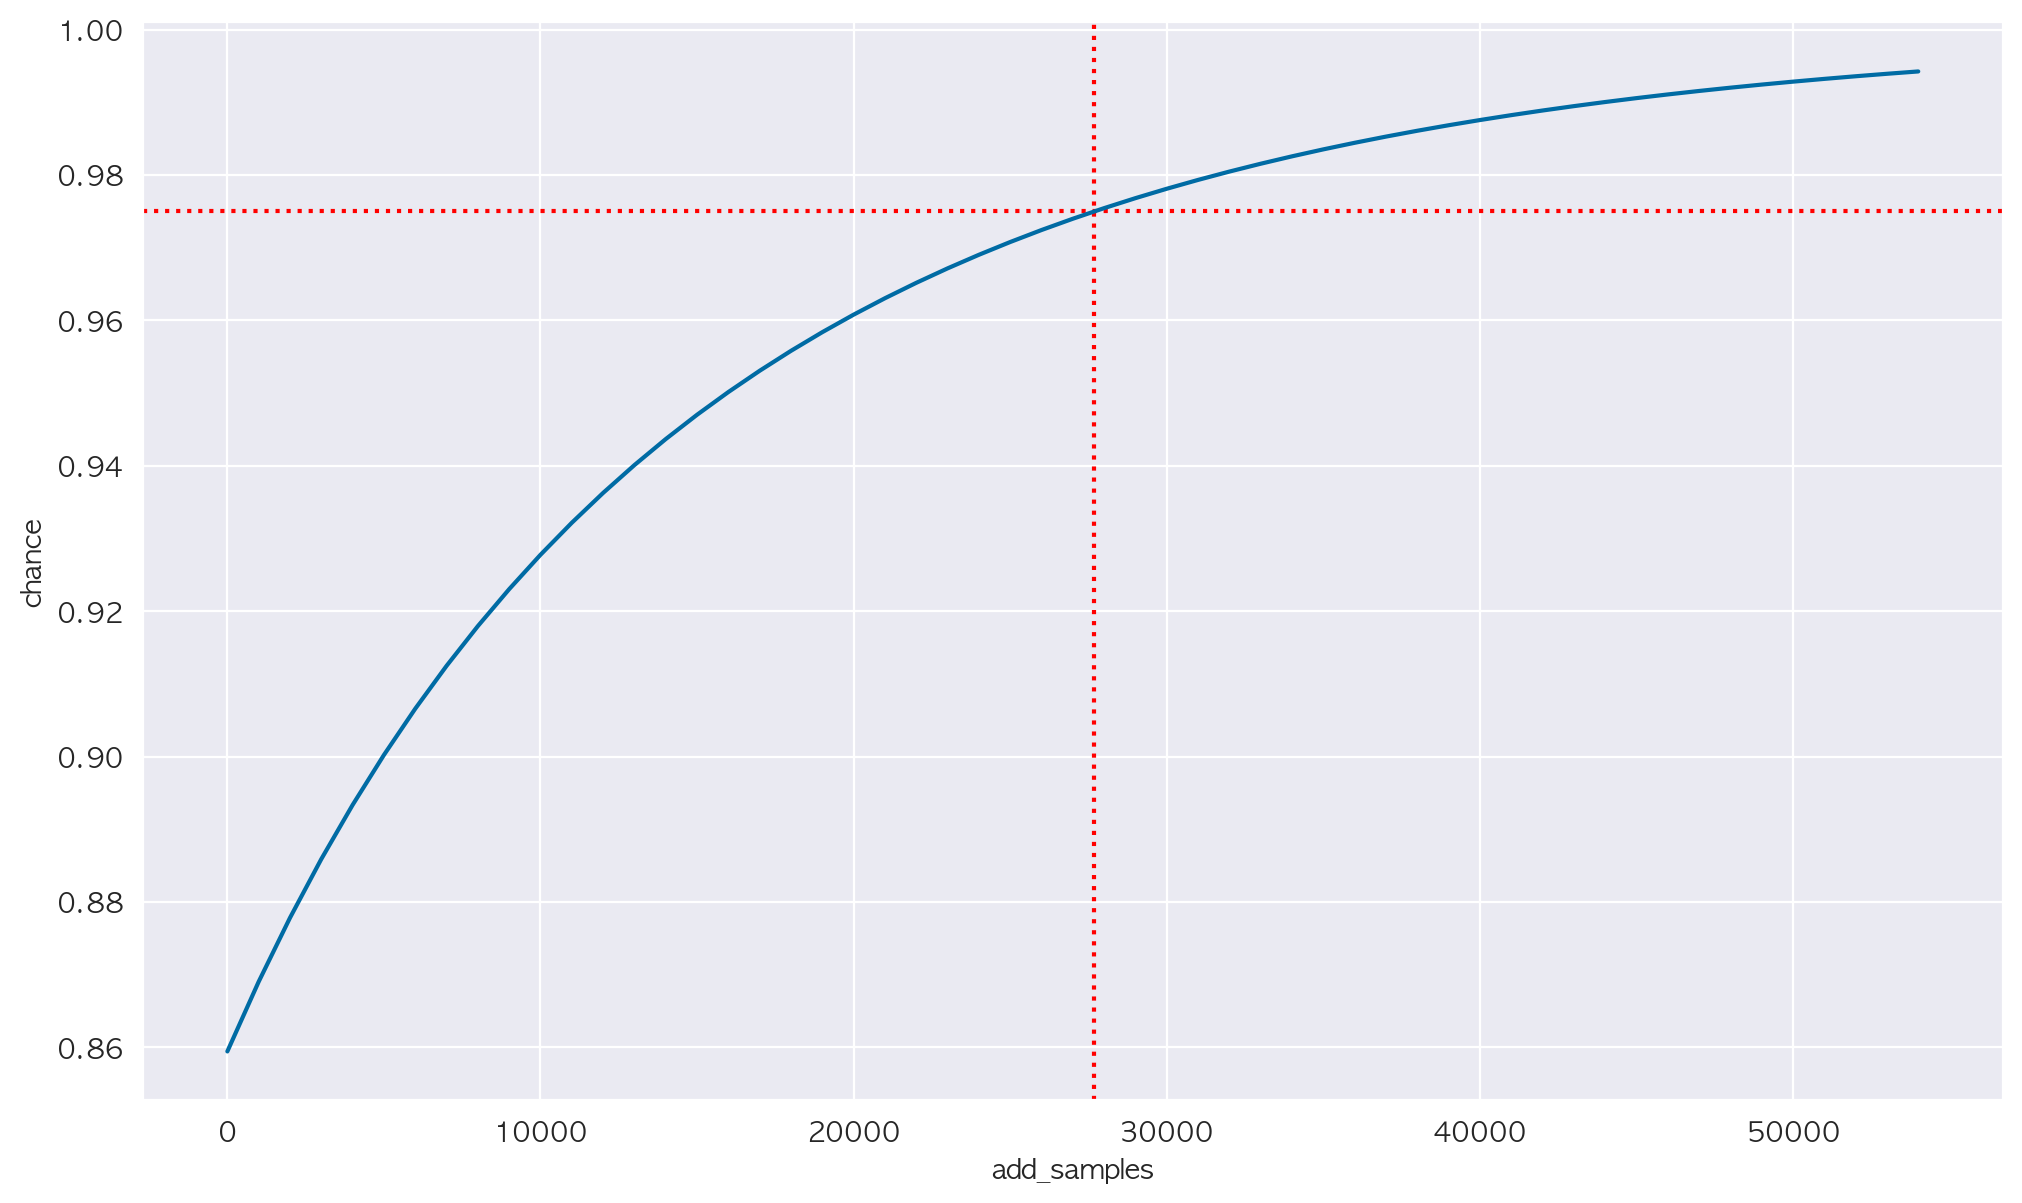

In [14]:
plt.figure(figsize=(12,7))
plt.axhline(0.975, ls = ':', color = 'r')
plt.axvline(more_samples, ls = ':', color = 'r')

sns.lineplot(x = 'add_samples', y = 'chance', data = add_samples)
plt.show()